In [1]:
# load dataset
import numpy as np
import pandas as pd

def fillna(df):
    df[df == "?"] = np.nan
    for col in ["workclass", "occupation", "native.country"]:
        df.fillna(df[col].mode(0)[0], inplace=True)
    return df
feature_names = []

def make_dataset():
    
    from sklearn.model_selection import train_test_split
    from sklearn import preprocessing
    from sklearn.preprocessing import StandardScaler
    train_data = pd.read_csv("../data/traindata.csv")
    train_label = pd.read_csv("../data/trainlabel.txt", header=None, names=["income"])
    train_data = pd.concat([train_data, train_label], axis=1)

    train_data = fillna(train_data)
    X = train_data.drop(["income"], axis=1)
    y = train_data["income"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    features = X.columns
    global feature_names
    feature_names = features
    for feature in features:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.fit_transform(X_test[feature])

    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=features)

    return X_train, X_test, y_train, y_test

In [2]:
X_train, X_test, y_train, y_test = make_dataset()

In [3]:
X_train.shape, X_test.shape

((15954, 14), (6838, 14))

In [4]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.785303,-0.081694,-1.360362,-1.116633,-1.959464,-0.414144,-1.025921,-0.904765,0.394873,0.704117,-0.279207,-0.203024,-2.026598,0.280103
1,-0.193417,-0.081694,0.088460,0.182255,-0.416249,-1.738241,1.731415,-0.281401,0.394873,0.704117,3.831940,-0.203024,0.384012,0.280103
2,1.638731,-0.081694,0.982129,-0.337301,1.126966,-1.738241,0.582525,-0.281401,0.394873,-1.420218,-0.279207,-0.203024,-1.361602,0.280103
3,0.246298,1.711076,-1.119963,-0.597078,0.355358,-0.414144,-0.796143,-0.904765,0.394873,0.704117,-0.279207,-0.203024,0.799634,0.280103
4,0.099727,-2.770848,-1.285447,-0.597078,0.355358,-0.414144,0.812303,2.212057,0.394873,-1.420218,-0.279207,-0.203024,2.046501,0.280103


In [5]:
def classification_report(model):
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred=model.predict(X_test), 
                                target_names=["income <  50k", "income >= 50k"]))

### K-近邻

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
print("Training set score: {:.5f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.5f}".format(clf.score(X_test, y_test)))
classification_report(clf)

Training set score: 0.87031
Test set score: 0.84133
               precision    recall  f1-score   support

income <  50k       0.87      0.93      0.90      5188
income >= 50k       0.73      0.55      0.63      1650

     accuracy                           0.84      6838
    macro avg       0.80      0.74      0.76      6838
 weighted avg       0.83      0.84      0.83      6838



In [7]:
# 不同的邻居个数
train_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    print(n_neighbors, end=" | ")


1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 

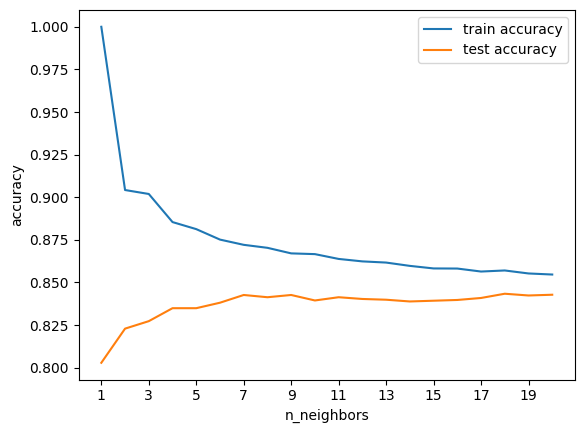

In [8]:
from matplotlib import pyplot as plt
plt.plot(neighbors_settings, train_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(neighbors_settings[::2])
plt.legend()

In [9]:
print("neighbors_settings:", neighbors_settings)
print("training accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)

neighbors_settings: range(1, 21)
training accuracy: [1.0, 0.9042246458568384, 0.9019054782499687, 0.8854205841795161, 0.8812836906105052, 0.87514103046258, 0.8720697003886173, 0.8703146546320671, 0.8670552839413314, 0.8666165225021938, 0.8637959132505955, 0.8623542685220007, 0.8616647862604989, 0.8597216998871756, 0.8582173749529899, 0.8581546947473988, 0.8563996489908486, 0.8570264510467595, 0.8552714052902094, 0.8546446032342986]
test accuracy: [0.8028663351857268, 0.8229014331675929, 0.8272886809008482, 0.8348932436384908, 0.8348932436384908, 0.8381105586428781, 0.8426440479672419, 0.8413278736472652, 0.8426440479672419, 0.8394267329628546, 0.8413278736472652, 0.8403041825095057, 0.8398654577361802, 0.8388417665984206, 0.8392804913717461, 0.8397192161450716, 0.8408891488739397, 0.8433752559227844, 0.8423515647850248, 0.8427902895583504]


LogisticRegression & LinearSVC

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))
classification_report(logreg100)

Training set score: 0.823
Test set score: 0.824
               precision    recall  f1-score   support

income <  50k       0.84      0.94      0.89      5188
income >= 50k       0.72      0.45      0.55      1650

     accuracy                           0.82      6838
    macro avg       0.78      0.69      0.72      6838
 weighted avg       0.81      0.82      0.81      6838



In [11]:
logreg1 = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.823
Test set score: 0.824


In [12]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.822
Test set score: 0.823


In [13]:
train_accuracy = []
test_accuracy = []
settings = [10**i for i in range(-5, 6)]

for s in settings:
    model = LogisticRegression(C=s)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    print(s, end=" | ")


1e-05 | 0.0001 | 0.001 | 0.01 | 0.1 | 1 | 10 | 100 | 1000 | 10000 | 100000 | 

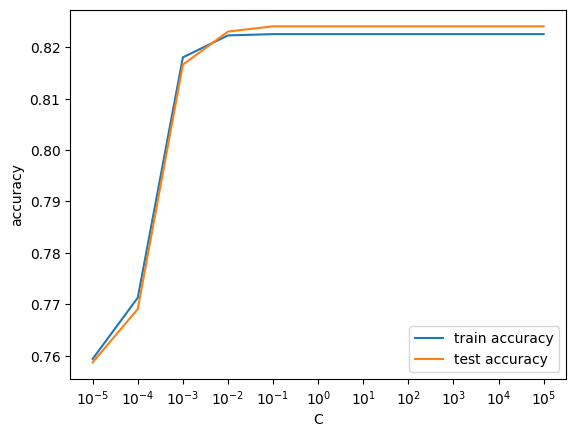

In [14]:
fig, ax = plt.subplots()
ax.plot(settings, train_accuracy, label="train accuracy")
ax.plot(settings, test_accuracy, label="test accuracy")
ax.set_xscale("log")
ax.set_xlabel("C")
ax.set_ylabel("accuracy")
ax.set_xticks(settings)
ax.legend()
plt.show()

In [15]:
print("settings:", settings)
print("training accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)

settings: [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
training accuracy: [0.7593706907358656, 0.7712799297981697, 0.8180393631691112, 0.8223016171493043, 0.8225523379716686, 0.8225523379716686, 0.8225523379716686, 0.8225523379716686, 0.8225523379716686, 0.8225523379716686, 0.8225523379716686]
test accuracy: [0.7587013746709564, 0.7690845276396607, 0.8166130447499269, 0.8230476747587013, 0.8240713658964609, 0.8240713658964609, 0.8240713658964609, 0.8240713658964609, 0.8240713658964609, 0.8240713658964609, 0.8240713658964609]


In [17]:
logreg1 = LinearSVC(C=1, max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))
classification_report(logreg1)

Training set score: 0.823
Test set score: 0.824
               precision    recall  f1-score   support

income <  50k       0.83      0.95      0.89      5188
income >= 50k       0.74      0.41      0.52      1650

     accuracy                           0.82      6838
    macro avg       0.79      0.68      0.71      6838
 weighted avg       0.81      0.82      0.80      6838



朴素贝叶斯

In [18]:
from sklearn.naive_bayes import BernoulliNB

bayes = BernoulliNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(bayes.score(X_train, y_train)))
print("Test set score: {:.3f}".format(bayes.score(X_test, y_test)))
classification_report(bayes)

Training set score: 0.799
Test set score: 0.808
               precision    recall  f1-score   support

income <  50k       0.87      0.87      0.87      5188
income >= 50k       0.60      0.61      0.60      1650

     accuracy                           0.81      6838
    macro avg       0.74      0.74      0.74      6838
 weighted avg       0.81      0.81      0.81      6838



决策树

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=2).fit(X_train, y_train)
print("Training set score: {:.3f}".format(model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.797


In [20]:
model = DecisionTreeClassifier(random_state=2, max_depth=5).fit(X_train, y_train)
print("Training set score: {:.3f}".format(model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model.score(X_test, y_test)))
classification_report(model)

Training set score: 0.851
Test set score: 0.851
               precision    recall  f1-score   support

income <  50k       0.87      0.95      0.91      5188
income >= 50k       0.78      0.54      0.64      1650

     accuracy                           0.85      6838
    macro avg       0.82      0.75      0.77      6838
 weighted avg       0.84      0.85      0.84      6838



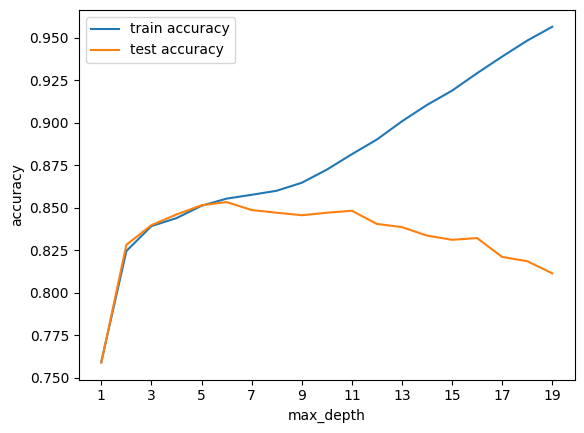

In [21]:
settings = range(1, 20)
train_acc, test_acc = [], []
for max_depth in settings:
    model = DecisionTreeClassifier(random_state=2, max_depth=max_depth).fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(settings, train_acc, label="train accuracy")
plt.plot(settings, test_acc, label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.xticks(settings[::2])
plt.legend()

In [22]:
print("settings:", settings)
print("training accuracy:", train_acc)
print("test accuracy:", test_acc)

settings: range(1, 20)
training accuracy: [0.7593706907358656, 0.8244954243449919, 0.8391625924533033, 0.8438636078726338, 0.8511345117211985, 0.8553340854958005, 0.8575905728970791, 0.8599724207095399, 0.8646734361288705, 0.8723831014165726, 0.8814717312272784, 0.8901215995988467, 0.9008399147549204, 0.9104926664159458, 0.9188918139651499, 0.929171367682086, 0.9389494797542935, 0.9483515105929547, 0.9564999373197944]
test accuracy: [0.7587013746709564, 0.8281661304474993, 0.8397192161450716, 0.8460076045627376, 0.8514185434337526, 0.8533196841181632, 0.8486399532026908, 0.8470312957004972, 0.8455688797894121, 0.8470312957004972, 0.8482012284293653, 0.8404504241006142, 0.8385492834162036, 0.8335770693185142, 0.8310909622696695, 0.8321146534074291, 0.8210002924831822, 0.8185141854343375, 0.8113483474700205]


In [23]:
# 树的特征的重要性
model = DecisionTreeClassifier(random_state=2, max_depth=max_depth).fit(X_train, y_train)
print(X_train.columns)
print(model.feature_importances_)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')
[0.10149945 0.03003734 0.1400846  0.01752943 0.12562068 0.00846086
 0.05425928 0.23667905 0.0102717  0.00366556 0.14047405 0.04399844
 0.07147293 0.01594664]


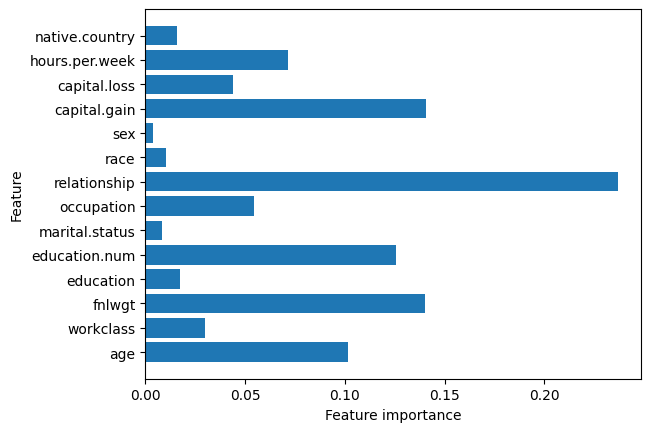

In [24]:
def plot_feature_importances_cancer(model):
    n_features = len(feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(model)

随机森林

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_features=8, max_depth=5, random_state=0).fit(X_train, y_train)
print("Training set score: {:.5f}".format(model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(model.score(X_test, y_test)))
classification_report(model)

Training set score: 0.85358
Test set score: 0.85273
               precision    recall  f1-score   support

income <  50k       0.87      0.95      0.91      5188
income >= 50k       0.79      0.53      0.64      1650

     accuracy                           0.85      6838
    macro avg       0.83      0.74      0.77      6838
 weighted avg       0.85      0.85      0.84      6838



In [26]:
class_weights = {
    0: 1.0,
    1: 1.0
}
model = RandomForestClassifier(n_estimators=200, class_weight=class_weights, max_features=8, max_depth=5, random_state=0).fit(X_train, y_train)
print("Training set score: {:.5f}".format(model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(model.score(X_test, y_test)))
classification_report(model)

Training set score: 0.85358
Test set score: 0.85273
               precision    recall  f1-score   support

income <  50k       0.87      0.95      0.91      5188
income >= 50k       0.79      0.53      0.64      1650

     accuracy                           0.85      6838
    macro avg       0.83      0.74      0.77      6838
 weighted avg       0.85      0.85      0.84      6838



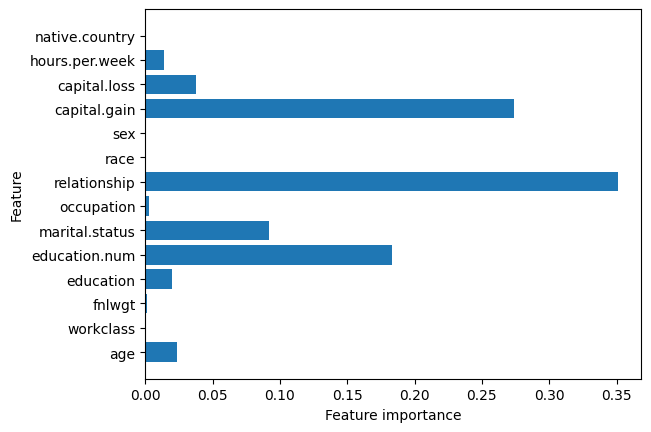

In [27]:
plot_feature_importances_cancer(model)

梯度提升

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=0).fit(X_train, y_train)
print("Training set score: {:.5f}".format(model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(model.score(X_test, y_test)))

Training set score: 0.87733
Test set score: 0.86648


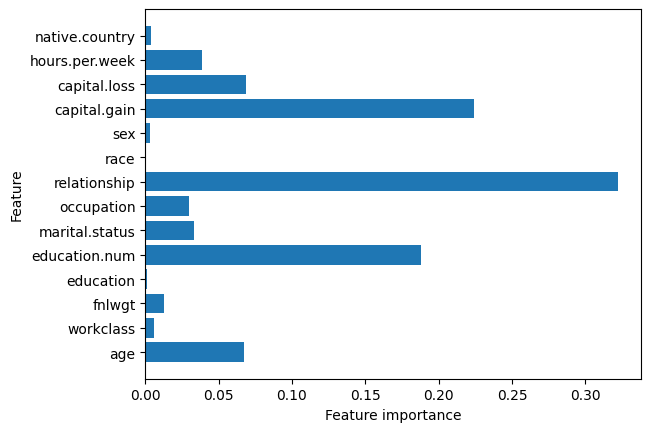

In [29]:
plot_feature_importances_cancer(model)

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200],
    'max_depth': [1, 2, 3, 4, 5, 6, 7],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=4, n_jobs=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=10,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [200]})

In [31]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}

In [32]:
grid_search.best_score_

0.8683089724173775

In [33]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, n_estimators=200)

In [34]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.233627,0.010992,0.005402,0.000972,0.001,1,200,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.759338,0.759338,0.759529,0.759278,0.759371,0.000094,36
1,2.154959,0.015284,0.007077,0.001084,0.001,2,200,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.759338,0.759338,0.759529,0.759278,0.759371,0.000094,36
2,3.007369,0.022720,0.006783,0.001964,0.001,3,200,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",0.759338,0.759338,0.759529,0.759278,0.759371,0.000094,36
3,3.855289,0.036802,0.012832,0.000508,0.001,4,200,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es...",0.759338,0.759338,0.759529,0.759278,0.759371,0.000094,36
4,4.709970,0.053793,0.016500,0.001110,0.001,5,200,"{'learning_rate': 0.001, 'max_depth': 5, 'n_es...",0.759338,0.759338,0.759529,0.759278,0.759371,0.000094,36


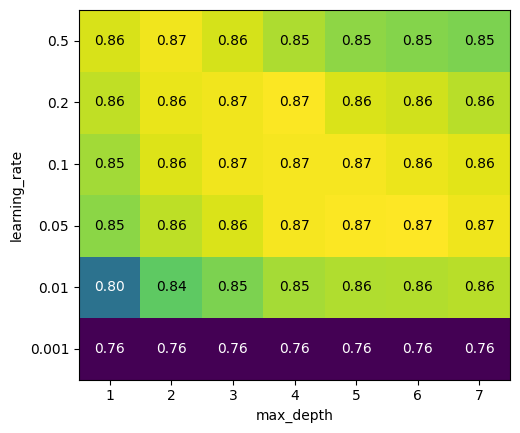

In [36]:
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 7)
mglearn.tools.heatmap(scores, xlabel="max_depth", xticklabels=param_grid["max_depth"],
                      ylabel="learning_rate", yticklabels=param_grid["learning_rate"],
                      cmap="viridis")

In [37]:
from sklearn.svm import SVC
model = SVC().fit(X_train, y_train)
print("Training set score: {:.5f}".format(model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(model.score(X_test, y_test)))

Training set score: 0.85772
Test set score: 0.85230


In [38]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000, alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.5f}".format(model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(model.score(X_test, y_test)))

Training set score: 0.86455
Test set score: 0.85332


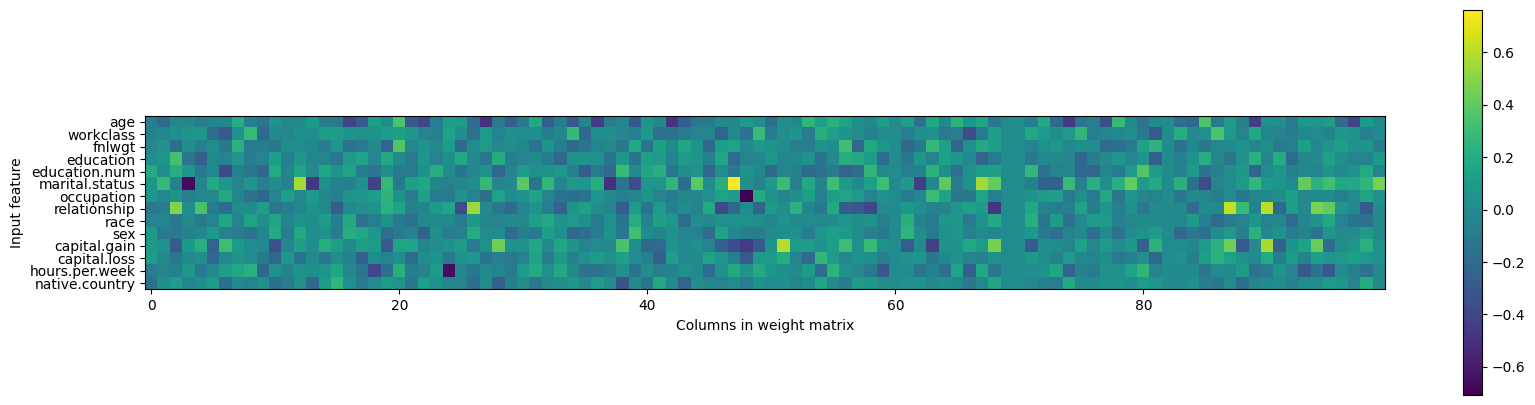

In [39]:
plt.figure(figsize=(20, 5))
plt.imshow(model.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [40]:
train_accuracy = []
test_accuracy = []
settings = [10**i for i in range(-5, 6)]

for s in settings:
    model = MLPClassifier(max_iter=1000, alpha=s)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    print(s, end=" | ")


1e-05 | 0.0001 | 0.001 | 0.01 | 0.1 | 1 | 10 | 100 | 1000 | 10000 | 100000 | 

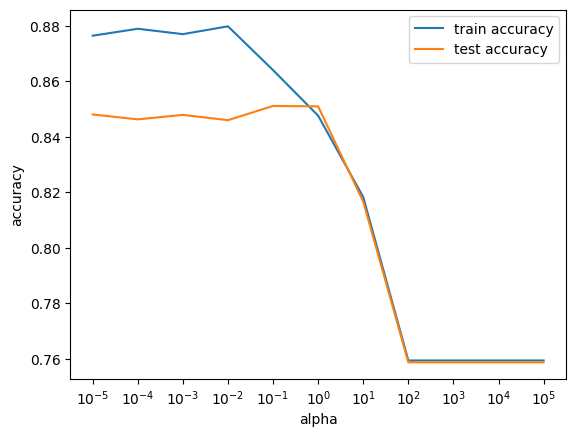

In [ ]:
fig, ax = plt.subplots()
ax.plot(settings, train_accuracy, label="train accuracy")
ax.plot(settings, test_accuracy, label="test accuracy")
ax.set_xscale("log")
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_xticks(settings)
ax.legend()
plt.show()